<a href="https://colab.research.google.com/github/shaking54/CS114.K21.KHTN/blob/master/Sarcasm_Headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data=pd.read_json('/content/drive/My Drive/Sarcasm_Headlines_Dataset.json', lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
sarcasm = data.drop(columns='article_link')

In [ ]:
sarcasm.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:

from sklearn.model_selection import train_test_split
X = sarcasm['headline']
y = sarcasm['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [ ]:
"""from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)"""

"from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\n\nvectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3))\nX_train = vectorizer.fit_transform(X_train)\nX_test = vectorizer.transform(X_test)"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer1 = CountVectorizer(analyzer='word',ngram_range=(1,3))

X_train = vectorizer1.fit_transform(X_train)
vectorizer2 = CountVectorizer(vocabulary=vectorizer1.vocabulary_,ngram_range=(1,3))

X_test = vectorizer2.fit_transform(X_test)
#print(X_prepared)

In [ ]:
vectorizer1.vocabulary_==vectorizer2.vocabulary_

True

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
print(clf.predict(vectorizer2.transform(['Study: Dolphins Not So Intelligent On Land'])))

[1]


In [ ]:
from sklearn.metrics import accuracy_score
SCV_score = accuracy_score(y_test, y_predict
                        )
SCV_score

0.8274054661175589

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_predict = tree_clf.predict(X_test)
tree_score = accuracy_score(y_test, tree_predict)


In [ ]:
tree_score

0.7658804442780481

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_clf = DecisionTreeClassifier()
random_clf.fit(X_train, y_train)
random_predict = random_clf.predict(X_test)
random_score = accuracy_score(y_test, random_predict)
random_score

0.7655060526644203

<BarContainer object of 3 artists>

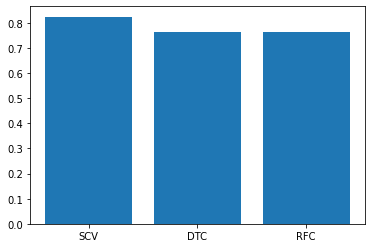

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(range(1))
plt.bar(['SCV', 'DTC', 'RFC'], [SCV_score, tree_score, random_score])

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
random_clf = DecisionTreeClassifier()
clf = SVC()
tree_clf = DecisionTreeClassifier()
voting_clf = VotingClassifier(
        estimators=[('svc', clf), ('rf', random_clf), ('dc', tree_clf)],
        voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('rf',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=N...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (clf, random_clf, tree_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8249095220267066
DecisionTreeClassifier 0.7600149756645451
DecisionTreeClassifier 0.7675028079371022
VotingClassifier 0.777361787095969


In [68]:
onion = pd.read_csv('TheOnion.txt', sep='\n')

In [75]:
onion = pd.read_json('onion.json')

In [76]:
onion.head()

,headline,is_sarcastic
0,Mental Health Experts Advise On Best Ways To C...,1
1,The Onion’s Father’s Day Gift Guide For The Da...,1
2,Staples Center Employee Realizes He Left Shot ...,1
3,Father’s Day Gifts That Will Make Your Dad Fee...,1
4,"Huh, Boyfriend’s Ex Just Made Interesting Hair...",1


In [77]:
Onion_X = onion['headline']
Onion_y = onion['is_sarcastic']

In [81]:
Onion_X = vectorizer2.fit_transform(Onion_X)

In [83]:
onion_predict = clf.predict(Onion_X)

In [84]:
onion_score = accuracy_score(Onion_y, onion_predict)

In [85]:
onion_score

0.5570971184631803